**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv('df_melbourne_entregable1.csv')
melb_df[:3]

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,...,CouncilArea,Lattitude,Longtitude,Regionname,date,price count,price mean,price min,price 50%,price max
0,Abbotsford,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,2016-03-12,157.0,140.292994,28.0,101.0,900.0
1,Abbotsford,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,...,Yarra,-37.7996,144.9984,Northern Metropolitan,2016-03-12,101.0,115.594059,30.0,96.0,400.0
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,...,Yarra,-37.8079,144.9934,Northern Metropolitan,2016-04-02,157.0,140.292994,28.0,101.0,900.0


In [3]:
#Copio el df original para tener un backup
melb_orig = melb_df.copy(deep=True)

#Eliminamos las columnas de fecha, latitud y longitud, ya que no las utilizaremos
melb_df = melb_df.drop(['Date','date','Lattitude', 'Longtitude'], axis=1)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


----

Antes de hacer el OneHot Encoding vamos a analizar las variables categóricas para ver en que casos conviene reducir el número de categorías únicas.

In [4]:
#Vamos a ver cuantos valores unicos tiene cada variable categorica
for a in melb_df.select_dtypes(include='object').columns:
    print('En la columna',a,'hay', len(melb_df[a].unique()), 'valores distintos')

En la columna Suburb hay 313 valores distintos
En la columna Type hay 3 valores distintos
En la columna Method hay 5 valores distintos
En la columna CouncilArea hay 280 valores distintos
En la columna Regionname hay 8 valores distintos


Decidimos reducir las categorías en las columnas Suburb y Council Area, dejando las que tienen una frecuencia mínima de 250 en el caso de la primera y 125 en el caso de la segunda. Las categorías debajo de esos mínimos se agruparon bajo "Other".

In [5]:
#Creamos categoría otros para categorías con frecuencias menores a 250 en la columna Suburb
OtherCat = melb_df.Suburb.value_counts() [melb_df.Suburb.value_counts() < 250]
melb_df['Suburb'] = np.where(melb_df['Suburb'].isin(OtherCat.index.to_list()), 'Other', melb_df['Suburb'])

#Creamos categoría otros para categorías con frecuencias menores a 125 en la columna ConcilArea
OtherCat = melb_df.CouncilArea.value_counts() [melb_df.CouncilArea.value_counts() < 125]
melb_df['CouncilArea'] = np.where(melb_df['CouncilArea'].isin(OtherCat.index.to_list()), 'Other', melb_df['CouncilArea'])

In [6]:
#Verificamos
for a in melb_df.select_dtypes(include='object').columns:
    print('En la columna',a,'hay', len(melb_df[a].unique()), 'valores distintos')

En la columna Suburb hay 32 valores distintos
En la columna Type hay 3 valores distintos
En la columna Method hay 5 valores distintos
En la columna CouncilArea hay 19 valores distintos
En la columna Regionname hay 8 valores distintos


Posteriormente comenzamos con el encoding.

In [7]:
#Excluimos columnas Building Area y Year Built
melb_short = melb_df.drop(['BuildingArea','YearBuilt'], axis=1)

#Vamos a usar OneHotEncoder, por lo que excluimos columnas numericas
melb_cat = melb_short.select_dtypes(exclude=np.number)

melb_cat.head(3)

,Suburb,Type,Method,CouncilArea,Regionname
0,Other,h,S,Yarra,Northern Metropolitan
1,Other,h,S,Yarra,Northern Metropolitan
2,Other,h,S,Yarra,Northern Metropolitan


In [8]:
#Importamos libreria, generamos objeto y codificamos
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False).fit(melb_cat)
melb_cat_encoded = encoder.transform(melb_cat)
list_columns_cat=list(encoder.get_feature_names())

#Sumamos columnas numericas
melb_matrix = np.hstack((melb_cat_encoded, melb_short.select_dtypes(include=np.number)))
list_columns=list_columns_cat+list(melb_short.select_dtypes(include=np.number).columns)

melb_matrix[:1]

#Si queremos ver los nombre de columnas usamos encoder.get_feature_names()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [9]:
print('Lista de las columnas \n',list_columns[:10])

Lista de las columnas 
 ['x0_Ascot Vale', 'x0_Balwyn North', 'x0_Bentleigh', 'x0_Bentleigh East', 'x0_Brighton', 'x0_Brighton East', 'x0_Brunswick', 'x0_Camberwell', 'x0_Carnegie', 'x0_Coburg']


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

----

Primero haremos la imputación tomando el dataframe original. A su vez se imputará con y sin escalamiento.

In [10]:
#Importamos librerias
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

#Tomamos df original y mantenemos solo columnas numéricas
melb_df_numeric = melb_df.select_dtypes(include=np.number)

In [11]:
#Escalamos todas las variables del df
scaler = MinMaxScaler().fit(melb_df_numeric)
melb_df_numeric_scaled = scaler.fit_transform(melb_df_numeric.values)

#Generamos objeto para imputar con KNN e imputamos
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_df_numeric_scaled = imputer.fit_transform(melb_df_numeric_scaled)

#Desescalamos para poder ver valores en terminos reales
melb_df_numeric_scaled = scaler.inverse_transform(melb_df_numeric_scaled)

#Pasamos de np.array a dataframe y agregamos los nombres de columnas 
melb_df_numeric_scaled = pd.DataFrame(melb_df_numeric_scaled)
melb_df_numeric_scaled.columns = melb_df_numeric.columns
melb_df_numeric_scaled.head()

/Users/itsupport/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,Rooms,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,price count,price mean,price min,price 50%,price max
0,2.0,1480000.0,2.5,3067.0,1.0,1.0,99.0,1906.0,157.0,140.292994,28.0,101.0,900.0
1,2.0,1480000.0,2.5,3067.0,1.0,1.0,99.8,1904.0,101.0,115.594059,30.0,96.0,400.0
2,2.0,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,157.0,140.292994,28.0,101.0,900.0
3,2.0,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,101.0,115.594059,30.0,96.0,400.0
4,3.0,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,157.0,140.292994,28.0,101.0,900.0


In [12]:
#Generamos objeto para imputar con KNN e imputamos
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_df_numeric_noscaled = imputer.fit_transform(melb_df_numeric.values)

#Pasamos de np.array a dataframe y agregamos los nombres de columnas 
melb_df_numeric_noscaled = pd.DataFrame(melb_df_numeric_noscaled)
melb_df_numeric_noscaled.columns = melb_df_numeric.columns
melb_df_numeric_noscaled.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,price count,price mean,price min,price 50%,price max
0,2.0,1480000.0,2.5,3067.0,1.0,1.0,180.0,1954.6,157.0,140.292994,28.0,101.0,900.0
1,2.0,1480000.0,2.5,3067.0,1.0,1.0,176.4,1947.0,101.0,115.594059,30.0,96.0,400.0
2,2.0,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,157.0,140.292994,28.0,101.0,900.0
3,2.0,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,101.0,115.594059,30.0,96.0,400.0
4,3.0,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,157.0,140.292994,28.0,101.0,900.0


----

Luego haremos la imputación tomando la matriz del punto 1

In [13]:
#Tomamos la matriz del punto anterior y sumamos las columnas que habiamos excluido
melb_matrix = np.hstack((melb_matrix, melb_df[['YearBuilt','BuildingArea']]))

In [14]:
#Escalamos todas las variables de la matriz
scaler = MinMaxScaler().fit(melb_matrix)
melb_matrix_scaled = scaler.fit_transform(melb_matrix)

#Generamos objeto para imputar con KNN e imputamos
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_matrix_scaled = imputer.fit_transform(melb_matrix_scaled)

#Desescalamos para poder ver valores en terminos reales
melb_matrix_scaled = scaler.inverse_transform(melb_matrix_scaled)

/Users/itsupport/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [15]:
#Pasamos de np.array a dataframe y agregamos los nombres de columnas 
melb_matrix_scaled = pd.DataFrame(melb_matrix_scaled, columns=list_columns + ['YearBuilt','BuildingArea'])
melb_matrix_scaled.head()

,x0_Ascot Vale,x0_Balwyn North,x0_Bentleigh,x0_Bentleigh East,x0_Brighton,x0_Brighton East,x0_Brunswick,x0_Camberwell,x0_Carnegie,x0_Coburg,...,Postcode,Bathroom,Car,price count,price mean,price min,price 50%,price max,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,1.0,157.0,140.292994,28.0,101.0,900.0,1915.0,100.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,1.0,101.0,115.594059,30.0,96.0,400.0,1917.0,94.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,0.0,157.0,140.292994,28.0,101.0,900.0,1900.0,79.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,0.0,101.0,115.594059,30.0,96.0,400.0,1900.0,79.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,2.0,0.0,157.0,140.292994,28.0,101.0,900.0,1900.0,150.0


In [16]:
#Generamos objeto para imputar con KNN e imputamos
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_matrix_noscaled = imputer.fit_transform(melb_matrix)

In [17]:
#Pasamos de np.array a dataframe y agregamos los nombres de columnas 
melb_matrix_noscaled = pd.DataFrame(melb_matrix_noscaled, columns=list_columns + ['YearBuilt','BuildingArea'])
melb_matrix_noscaled.head()

,x0_Ascot Vale,x0_Balwyn North,x0_Bentleigh,x0_Bentleigh East,x0_Brighton,x0_Brighton East,x0_Brunswick,x0_Camberwell,x0_Carnegie,x0_Coburg,...,Postcode,Bathroom,Car,price count,price mean,price min,price 50%,price max,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,1.0,157.0,140.292994,28.0,101.0,900.0,1954.6,180.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,1.0,101.0,115.594059,30.0,96.0,400.0,1947.0,176.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,0.0,157.0,140.292994,28.0,101.0,900.0,1900.0,79.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,0.0,101.0,115.594059,30.0,96.0,400.0,1900.0,79.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,2.0,0.0,157.0,140.292994,28.0,101.0,900.0,1900.0,150.0


(1800.0, 2100.0)

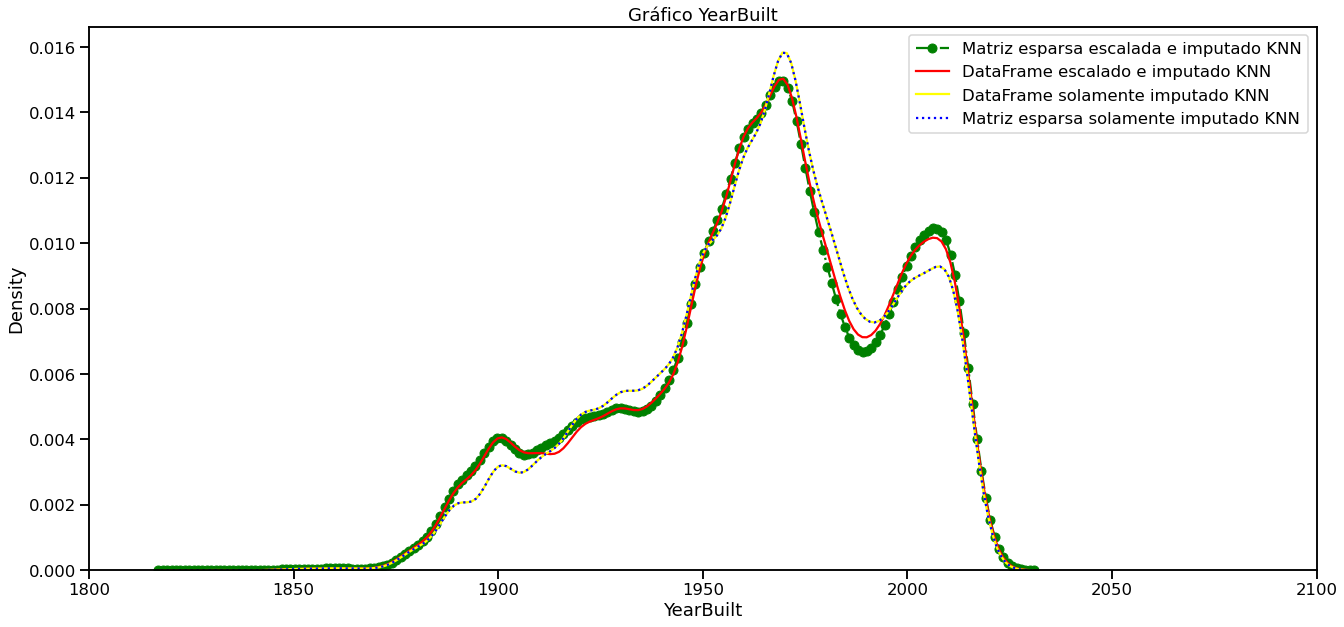

In [18]:
plt.figure(figsize=(22,10))
sns.kdeplot(data=melb_matrix_scaled.YearBuilt, color="green", marker="o", linestyle="dashdot", label="Matriz esparsa escalada e imputado KNN")
sns.kdeplot(data=melb_df_numeric_scaled.YearBuilt, color="red", label="DataFrame escalado e imputado KNN")
sns.kdeplot(data=melb_df_numeric_noscaled.YearBuilt, color="yellow", label="DataFrame solamente imputado KNN")

sns.kdeplot(data=melb_matrix_noscaled.YearBuilt, color="blue", linestyle=":", label="Matriz esparsa solamente imputado KNN")
#plt.title("melb_KNN.YearBuilt_desescalado")
plt.title("Gráfico YearBuilt")
plt.legend()
plt.xlim((1800,2100))

(0.0, 800.0)

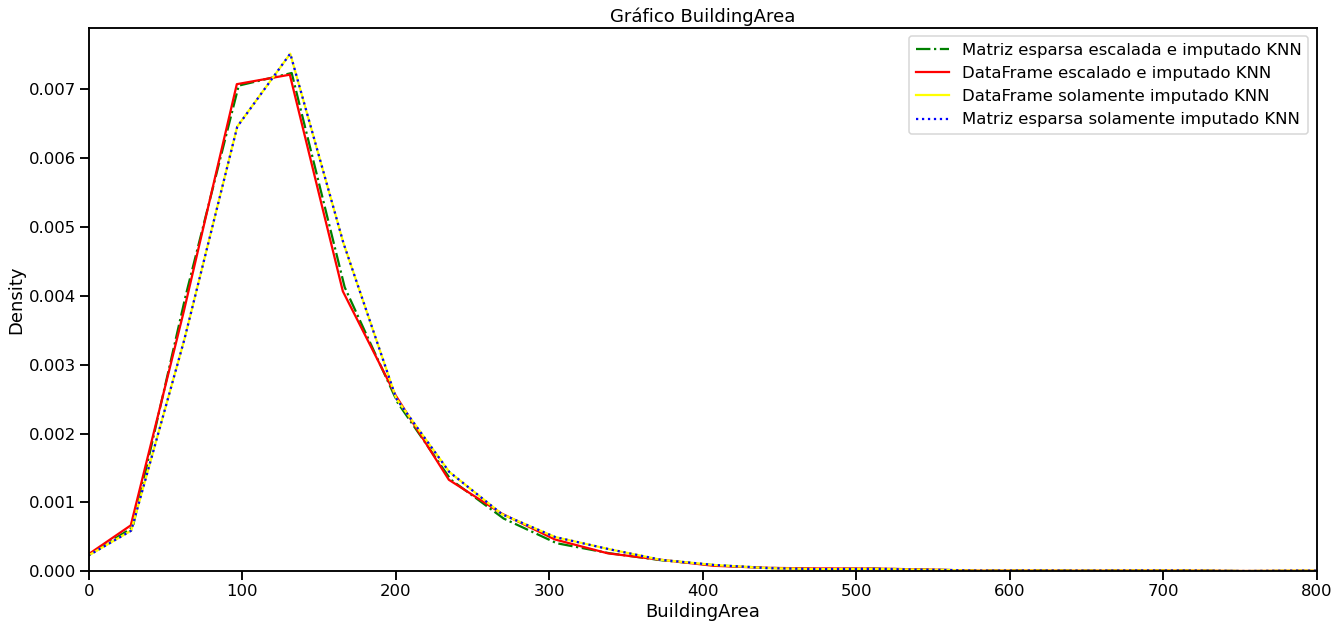

In [19]:
plt.figure(figsize=(22,10))
sns.kdeplot(data=melb_matrix_scaled.BuildingArea, color="green", linestyle="dashdot", label="Matriz esparsa escalada e imputado KNN")
sns.kdeplot(data=melb_df_numeric_scaled.BuildingArea, color="red", label="DataFrame escalado e imputado KNN")
sns.kdeplot(data=melb_df_numeric_noscaled.BuildingArea, color="yellow", label="DataFrame solamente imputado KNN")

sns.kdeplot(data=melb_matrix_noscaled.BuildingArea, color="blue", linestyle=":", label="Matriz esparsa solamente imputado KNN")
#plt.title("melb_KNN.YearBuilt_desescalado")
plt.title("Gráfico BuildingArea")
plt.legend()
plt.xlim((0,800))

Para poder comparar adecuadamente ambas imputaciones fue necesario desescalar las variables escaladas (aunque no sabemos si es correcta la forma en la que se hizo o si conviene escalar todo).

Hay una clara diferencia entre la imputación con y sin escalar.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

----

En primer lugar vamos a escalar los datos ya que el PCA usa métodos basados en distancias, y por ende si los valores usan distintas escalas aquellos con mayores números absolutos estarán sobrerepresentados.

In [20]:
from sklearn.preprocessing import MinMaxScaler

#Escalamos todas las variables de la matriz (tomamos la matriz que antes habia sido escalada para poder imputar las otras dos columnas)
scaler = MinMaxScaler().fit(melb_matrix_scaled)
melb_matrix_pca = scaler.fit_transform(melb_matrix_scaled.values)

Luego aplicamos el PCA

In [21]:
from sklearn.decomposition import PCA

#Generamos objeto usando el n de la consigna
n = min(20, melb_matrix_pca.shape[1])
pca = PCA(n_components=20)                                  


pca.fit(melb_matrix_pca)

PCA(n_components=20)

In [22]:
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[-0.00404263  0.01740194  0.01605727 ...  0.03103746  0.03830887
  -0.00382102]
 [-0.00177427 -0.01408734 -0.00906231 ...  0.04610833  0.00732252
  -0.00519184]
 [ 0.00694509 -0.02586379 -0.01889756 ... -0.02569683  0.1164302
  -0.00431604]
 ...
 [-0.03072322  0.00108884  0.00340852 ...  0.00545725  0.05285688
   0.00122798]
 [-0.01207171  0.00571134  0.00437776 ... -0.00277882  0.03923432
  -0.00044205]
 [ 0.011603   -0.00283626  0.01490676 ...  0.01217331 -0.04979643
  -0.0009111 ]]
Explained variance: 
[0.46430163 0.35233662 0.31885486 0.28593102 0.24834673 0.13237296
 0.12554178 0.11527005 0.1134725  0.09768922 0.08816521 0.08286841
 0.06729057 0.06526374 0.06451726 0.05437906 0.04924204 0.04382819
 0.0437049  0.03636229]
Explained variance ratio
[0.13617737 0.10333859 0.09351855 0.08386215 0.07283887 0.03882433
 0.03682078 0.03380813 0.03328092 0.02865177 0.02585842 0.02430489
 0.01973599 0.01914153 0.01892259 0.01594911 0.01444245 0.01285459
 0.01281843 0.01

Completado el PCA, generamos graficos para visualizar cuanta varianza está explicada por cada componente de forma individual y también de forma acumulada

Text(0.5, 1.0, 'Varianza explicada por componente principal')

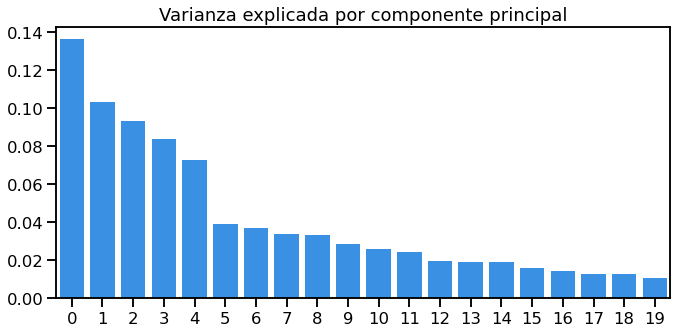

In [23]:
plt.figure(figsize=(11,5))
sns.barplot(x=[i for i in range(20)], y=[pca.explained_variance_ratio_[i] for i in range(20)], color='dodgerblue')
plt.title("Varianza explicada por componente principal")

Text(0.5, 1.0, 'Varianza explicada por componente principal acumulado')

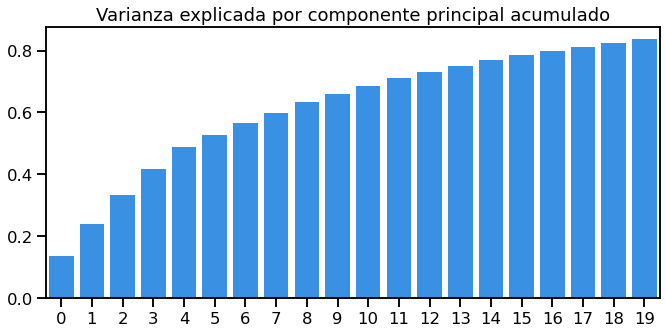

In [24]:
plt.figure(figsize=(11,5))
sns.barplot(x=[i for i in range(20)], y=[sum([pca.explained_variance_ratio_[i] for i in range(x)]) for x in range(1,21)], color='dodgerblue')
plt.title("Varianza explicada por componente principal acumulado")

Con 20 componentes (de los 80 que tiene todo el dataframe) somos capaces de explicar un 80% de la varianza acumulada. 

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

----
Este paso se hizo en el ejercicio 2 para poder visualizar de forma más intuitiva los resultados de la imputación, por lo que nos limitaremos a mostrar las primeras filas del df resultante y a guardarlo en un csv.

In [25]:
melb_matrix_scaled.head(10)

,x0_Ascot Vale,x0_Balwyn North,x0_Bentleigh,x0_Bentleigh East,x0_Brighton,x0_Brighton East,x0_Brunswick,x0_Camberwell,x0_Carnegie,x0_Coburg,...,Postcode,Bathroom,Car,price count,price mean,price min,price 50%,price max,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,1.0,157.0,140.292994,28.0,101.0,900.0,1915.0,100.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,1.0,101.0,115.594059,30.0,96.0,400.0,1917.0,94.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,0.0,157.0,140.292994,28.0,101.0,900.0,1900.0,79.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,0.0,101.0,115.594059,30.0,96.0,400.0,1900.0,79.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,2.0,0.0,157.0,140.292994,28.0,101.0,900.0,1900.0,150.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,2.0,0.0,101.0,115.594059,30.0,96.0,400.0,1900.0,150.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,2.0,1.0,157.0,140.292994,28.0,101.0,900.0,1961.6,118.8
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,2.0,1.0,101.0,115.594059,30.0,96.0,400.0,1988.0,118.8
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,2.0,157.0,140.292994,28.0,101.0,900.0,2014.0,142.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,1.0,2.0,101.0,115.594059,30.0,96.0,400.0,2014.0,142.0


In [26]:
melb_matrix_scaled.to_csv('df_melbourne_entregable2.csv', index=False)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
